#**Vehicle Prices Data**


---



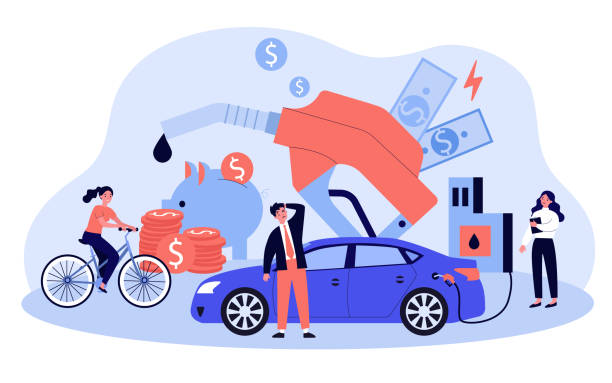

#### Objective

The objective of this notebook is to give a brief idea about the optimal price range of bikes, cars and electric 3 wheelers to enter in the market


---



In [ ]:
# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Reading the data

In [ ]:
df = pd.read_csv("Vehicles_.csv")

In [ ]:
df.head()

,Bikes,Bikes_price,Cars,Cars_model,Cars_price
0,Okaya Faast,109000,Pravaig,DEFY,3950000.0
1,Hero Electric Atria,77767,Tata,Tigor EV,1375000.0
2,Okinawa Ridge Plus,66954,PMV,EaS E,479000.0
3,BGauss D15,99999,BYD,Atto 3,3399000.0
4,PURE EV ETrance Neo,84855,Mercedes-Benz,EQS,24500000.0


Dataset contains price information of about 36 bikes and 24 cars with their respective models


---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bikes        36 non-null     object 
 1   Bikes_price  36 non-null     int64  
 2   Cars         24 non-null     object 
 3   Cars_model   24 non-null     object 
 4   Cars_price   24 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ KB


In [ ]:
df1=df[['Bikes','Bikes_price']]
df1.head()

,Bikes,Bikes_price
0,Okaya Faast,109000
1,Hero Electric Atria,77767
2,Okinawa Ridge Plus,66954
3,BGauss D15,99999
4,PURE EV ETrance Neo,84855


In [ ]:
df1.shape

(36, 2)

There are total 36 rows and 2 columns in the dataframe


---



In [ ]:
df1.isna().sum()

Bikes          0
Bikes_price    0
dtype: int64

Here none of the column is null so we can move further.

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Bikes_price,36.0,78454.5,19700.415261,42200.0,67011.75,75519.5,83886.0,145000.0


- The average price of the bikes is Rs. 78,454.5
- The minimum price of the bikes is Rs. 42,200
- The maximum price of the bikes is Rs. 1,45,000



In [ ]:
df1_sorted_desc= df1.sort_values('Bikes_price',ascending=False)

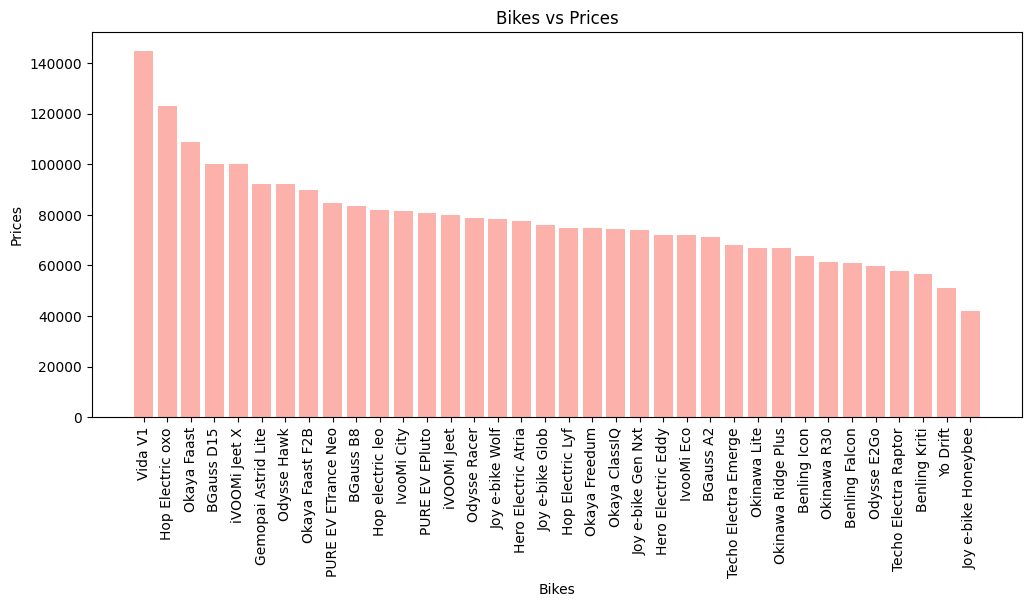

In [ ]:
plt_1 = plt.figure(figsize=(12,5))
plt.bar(df1_sorted_desc.Bikes, df1_sorted_desc.Bikes_price,alpha = 0.6,color='salmon')
plt.xticks(rotation = 90)
plt.xlabel('Bikes')
plt.ylabel('Prices')
plt.title('Bikes vs Prices')
plt.show()

Bike named 'Vida V1' has the highest price and that goes upto the bike named 'Joy e-bike Honeybee' which having the least price


---



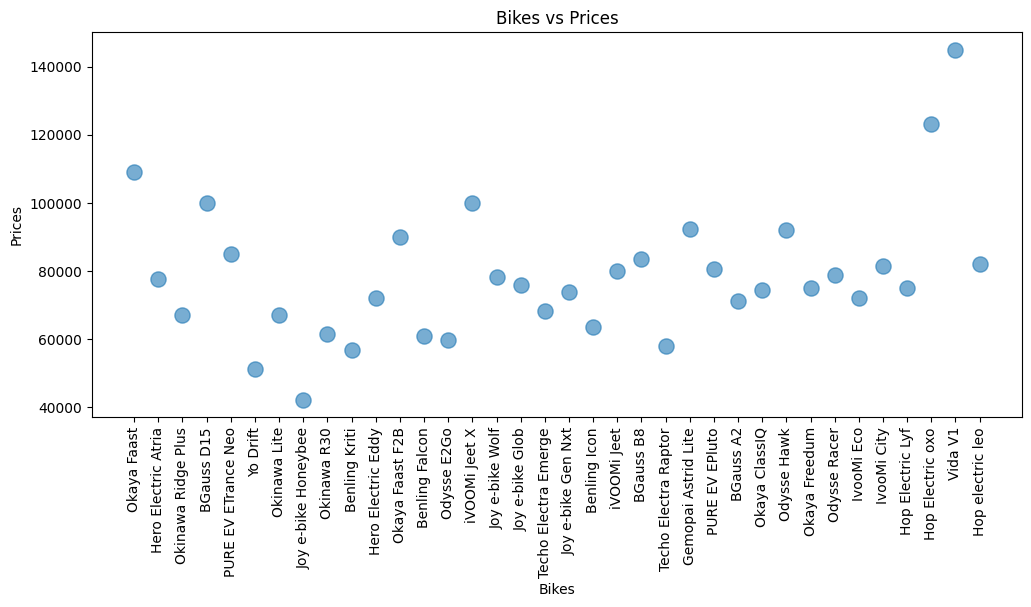

In [ ]:
plt_1 = plt.figure(figsize=(12,5))
plt.scatter(df1.Bikes, df1.Bikes_price,alpha = 0.6, s=120)
plt.xticks(rotation = 90)
plt.xlabel('Bikes')
plt.ylabel('Prices')
plt.title('Bikes vs Prices')
plt.show()

- Here we can see the distribution of bikes with respect to their corresponding prices
- Most of the bikes are in the range of Rs.40,000 to Rs.1,00,000 whereas the highest priced is bike is above Rs.1,40,000


---



In [ ]:
df2=df[['Cars','Cars_model','Cars_price']]
df2.head()

,Cars,Cars_model,Cars_price
0,Pravaig,DEFY,3950000.0
1,Tata,Tigor EV,1375000.0
2,PMV,EaS E,479000.0
3,BYD,Atto 3,3399000.0
4,Mercedes-Benz,EQS,24500000.0


In [ ]:
df2.isna().sum()

Cars          12
Cars_model    12
Cars_price    12
dtype: int64

Here we get 12 null values in each column, we have to remove or adjust them to move further

In [ ]:
df2=df2.dropna()
df2.isna().sum()

Cars          0
Cars_model    0
Cars_price    0
dtype: int64

Now, none of the column is null so we can move further.

In [ ]:
df2.shape

(24, 3)

There are 24 rows and 3 columns in tha dataframe


---



In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Cars_price,24.0,7.396458e+06,7.291047e+06,450000.0,1940500.0,4520000.0,11700000.0,24500000.0


- The average price of the cars is Rs. 73,96,458.333
- The minimum price of the cars is Rs. 4,50,000
- The maximum price of the cars is Rs. 2,45,00,000


---



* Here, for premium customers we can set the price of 1 crore or above 1 crore.
* For other class of customers the price range can be in the range of 15 lakhs to 60 lakhs.

In [ ]:
df2_sorted_desc= df2.sort_values('Cars_price',ascending=False)

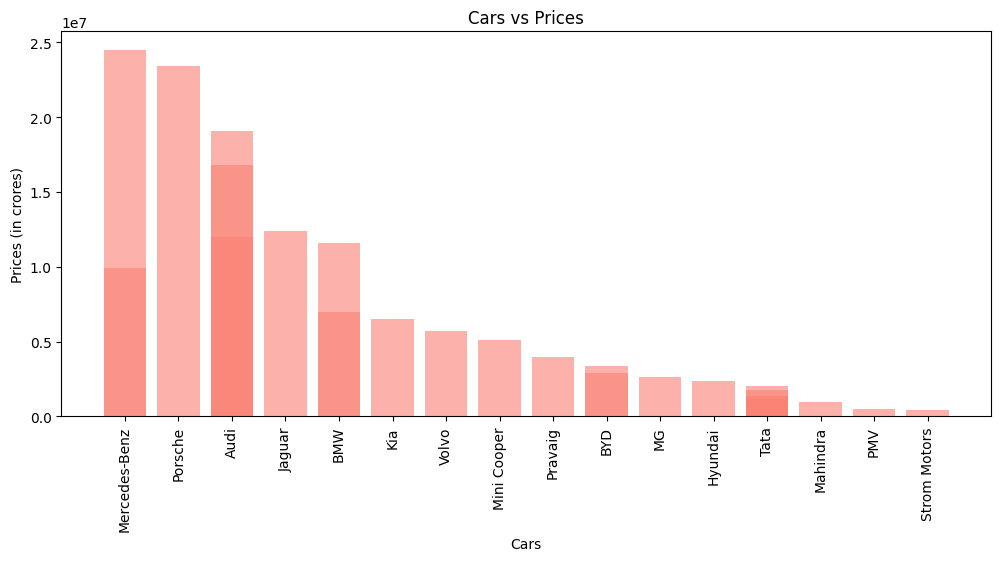

In [ ]:
plt_2 = plt.figure(figsize=(12,5))
plt.bar(df2_sorted_desc.Cars, df2_sorted_desc.Cars_price,alpha = 0.6, color='salmon')
plt.xticks(rotation = 90)
plt.xlabel('Cars')
plt.ylabel('Prices (in crores)')
plt.title('Cars vs Prices')
plt.show()

Car of 'Mercedes-Benz' has the highest price and that goes upto the car of 'Storm Motors' which having the least price


---



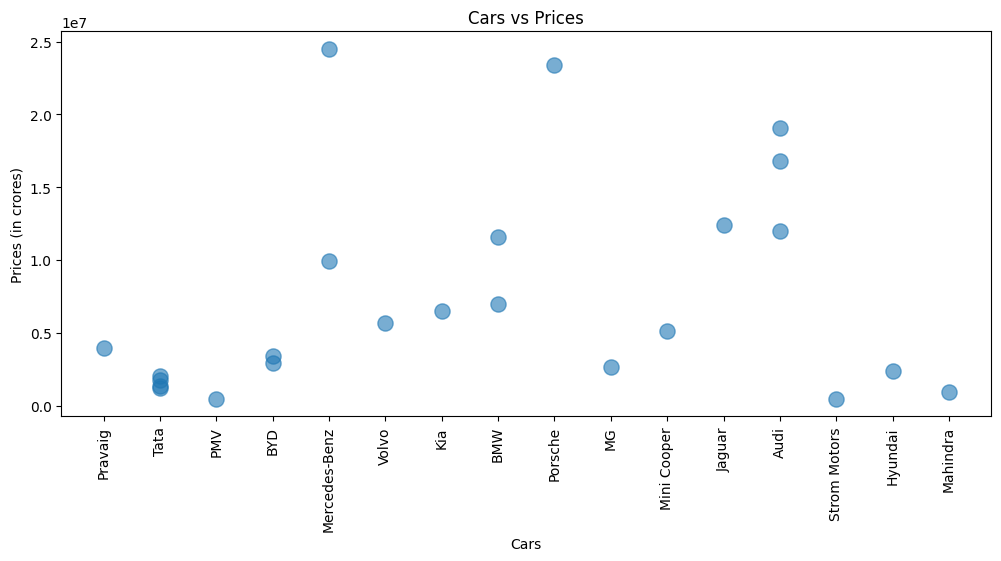

In [ ]:
plt_2 = plt.figure(figsize=(12,5))
plt.scatter(df2.Cars, df2.Cars_price,alpha = 0.6, s=120)
plt.xticks(rotation = 90)
plt.xlabel('Cars')
plt.ylabel('Prices (in crores)')
plt.title('Cars vs Prices')
plt.show()

- Here we can see the distribution of cars with respect to their corresponding prices
- Most of the cars are below the range of Rs.1.5 crore whereas the highest priced is car is near to Rs.2.5 crore


---



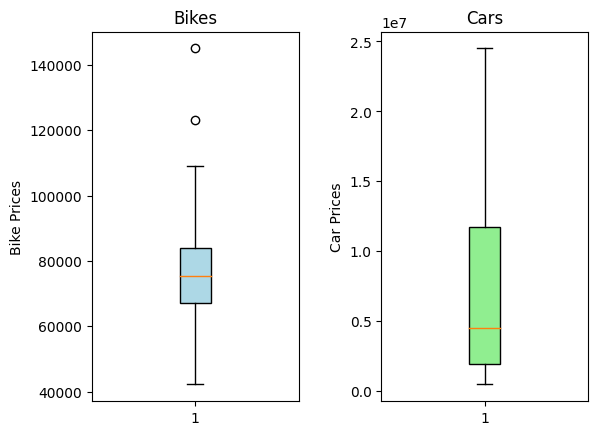

In [ ]:
bikes_prices = list(df['Bikes_price'])
cars_prices = list(df['Cars_price'])

# Remove non-finite values from 'Cars_price' column
cars_prices_clean = np.array(cars_prices)
cars_prices_clean = cars_prices_clean[np.isfinite(cars_prices_clean)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4)  # Adjust the spacing between subplots

# Plot boxplot for bikes
ax1.boxplot(bikes_prices, patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax1.set_ylabel('Bike Prices')
ax1.set_title('Bikes')

# Plot boxplot for cars
ax2.boxplot(cars_prices_clean, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax2.set_ylabel('Car Prices')
ax2.set_title('Cars')

# Show the plot
plt.show()

- From the first box plot as we can see that there are 2 outliers basically not the extreme outliers we can conclude that there are 2 bikes which are at higher prices while remaining are in the range of RS.68,000 to Rs.82,000

- In the second box plot there are no outliers present

- Also from the length of the boxes we can conclude that longer box of car prices indicates a larger range of prices within the interquartile range, which indicates greater variability in prices for the category while there is less variability in the bike prices


---



#### Conclusion:

* The price range of bikes is between Rs.40,000 to Rs.1,50,000
* The price range of cars is between Rs.4,50,000 to Rs.2,45,00,000
* Electric 3 wheelers are available between price range of Rs. 1.5 lakh to Rs. 3 lakh depending on the brand and their features